In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_excel('Datasets/Dry_Bean_Dataset.xlsx')

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# print variable types for the different columns
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [28]:
# from dataframe to numpy array
X = df.drop(["Class"], axis=1).values
y = df["Class"].values
columns = df.columns

In [29]:
classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA', 'SOMA', 'SULTAN', 'VAGON']
y = np.array([classes.index(c) for c in y])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10888, 16), (2723, 16), (10888,), (2723,))

In [32]:
def PCA(data, center=True):
    
    if center:
        data_centered = (data - np.mean(data))/np.std(data)
    else:
        data_centered = data
    
    covariance_matrix = np.cov(data_centered.T)
    #covariance_matrix = 1/len(data_centered) * data_centered.T.dot(data_centered)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    sorted_indices = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]
    
    return data_centered, eigenvalues, eigenvectors

In [33]:
X_train_cen, eig_vals, eig_vecs = PCA(X_train, center=False)

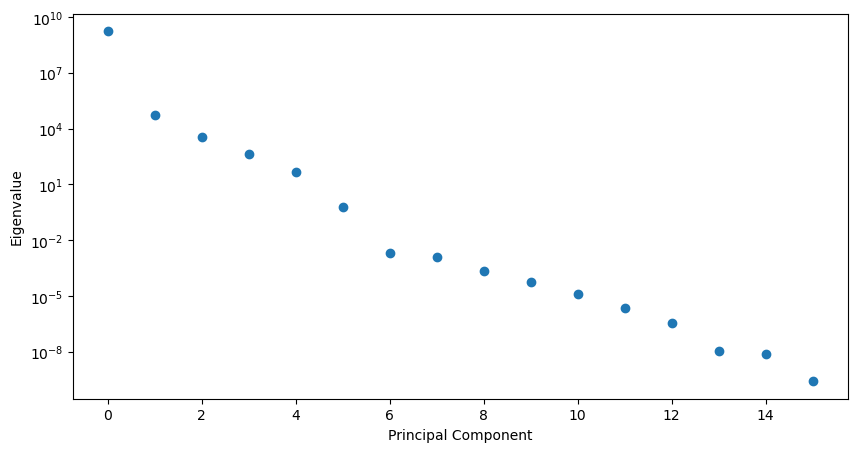

In [34]:
# Plot the eigenvalues spectrum

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(eig_vals, 'o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.yscale('log')
plt.show()

In [35]:
# Compute the explained variance

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [36]:
cum_var_exp

array([ 99.99672927,  99.99978089,  99.99997399,  99.99999743,
        99.99999996, 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ])

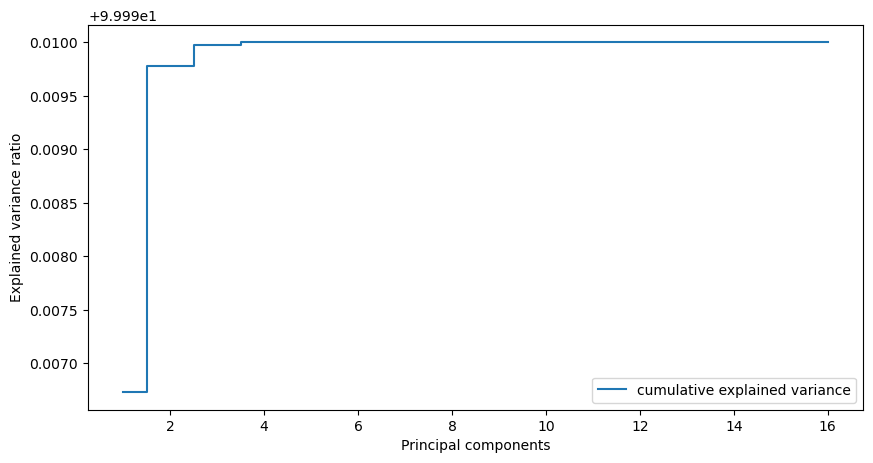

In [37]:
# plot the explained variance

plt.figure(figsize=(10,5))
#plt.bar(range(1, 17), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 17), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [38]:
X_pca = X_train_cen.dot(eig_vecs[:,:2])
X_pca.shape

(10888, 2)

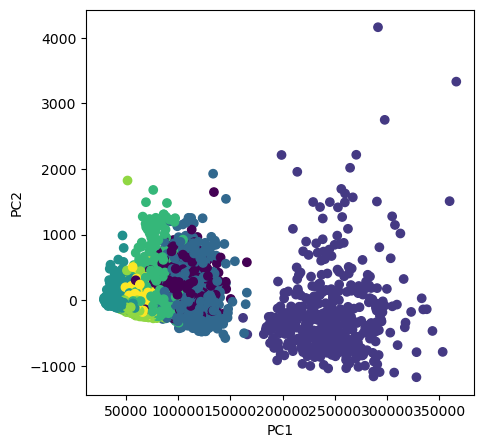

In [39]:
# Plot the data in the new space

plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [40]:
X_pca_3D = X_train_cen.dot(eig_vecs[:,:3])

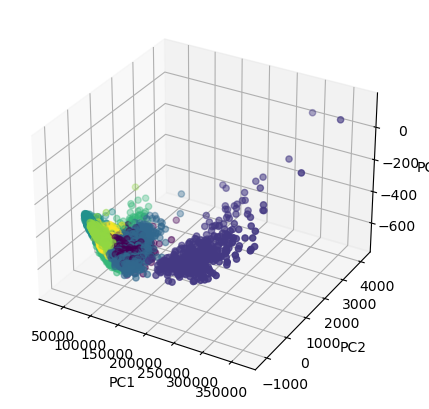

In [41]:
# plot the data in the new space

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3D[:,0], X_pca_3D[:,1], X_pca_3D[:,2], c=y_train)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [1]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples=2000)

In [25]:
def swiss_roll(n): #from lab 1
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,1,n)
               
    data[:,0]=phi*np.cos(phi) #x coordinte
    data[:,1]=phi*np.sin(phi) #y coordinate
    data[:,2]=psi #z coordinate
    return data

In [26]:
import numpy as np
X = swiss_roll(1000)

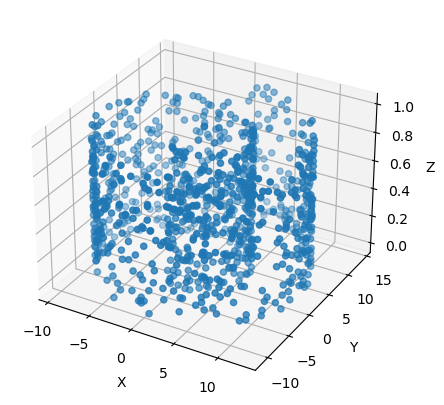

In [28]:
# plot the data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [29]:
def PCA(data, center=True):
    
    if center:
        data_centered = (data - np.mean(data))/np.std(data)
    else:
        data_centered = data
    
    covariance_matrix = np.cov(data_centered.T)
    #covariance_matrix = 1/len(data_centered) * data_centered.T.dot(data_centered)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    sorted_indices = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:,sorted_indices]
    
    return data_centered, eigenvalues, eigenvectors

In [22]:
np.std(X, axis=0)

array([6.60166807, 7.13103851, 2.88565975])

In [30]:
X_centered, eig_vals, eig_vecs = PCA(X, center=True)

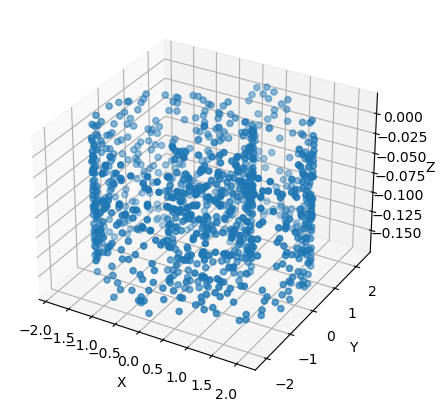

In [31]:
# plot X_centered

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_centered[:,0], X_centered[:,1], X_centered[:,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

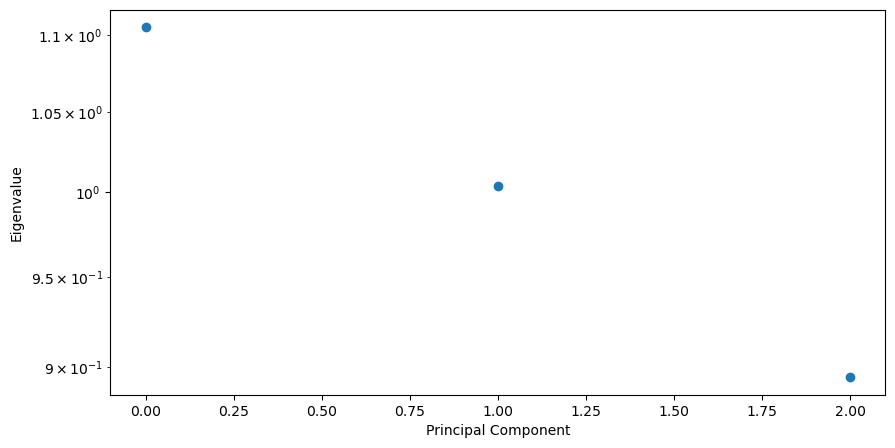

In [19]:
# plot the eigenvalues spectrum

plt.figure(figsize=(10,5))
plt.plot(eig_vals, 'o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.yscale('log')
plt.show()

In [32]:
X_pca = X_centered.dot(eig_vecs[:,:2])

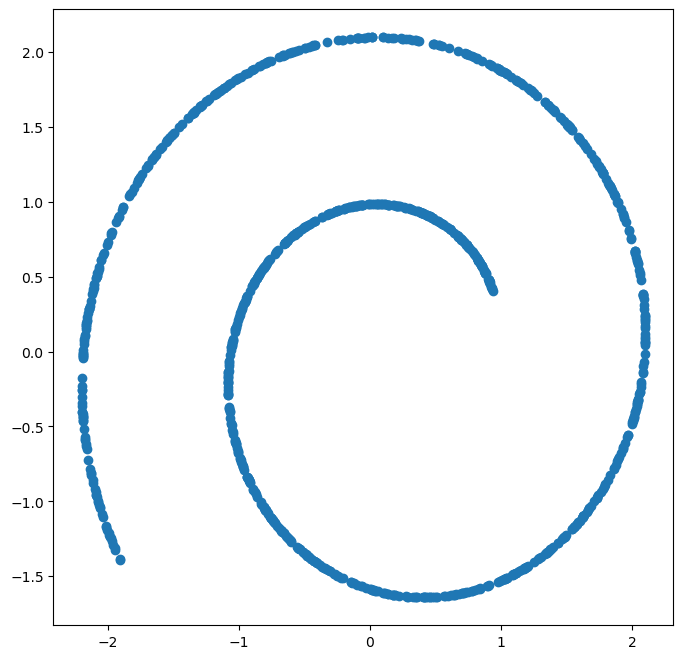

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0], X_pca[:,1])

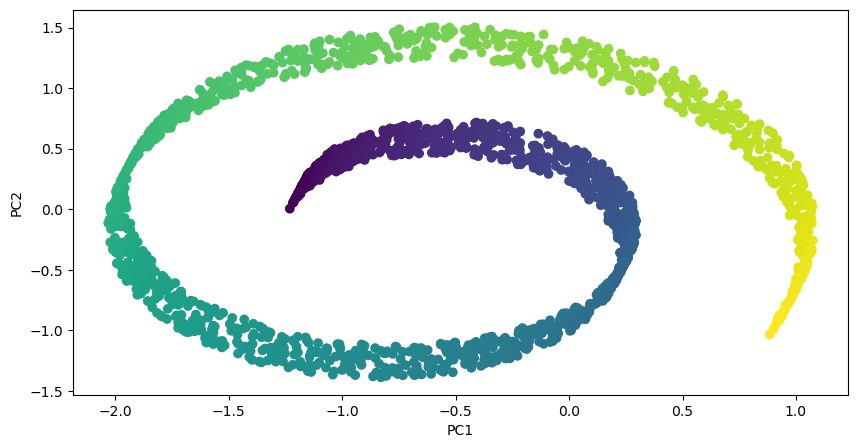

In [55]:
# plot the data in the new space

plt.figure(figsize=(10,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1]:
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(121, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.tab10)
# ax.set_title("Original data")

# ax = fig.add_subplot(122)
# ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.tab10)
# ax.set_title("PCA-reduced data")

# plt.show()